In [1]:
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
#from IPython import  display
#display.set_matplotlib_formats('svg')

## Running experiments to understand gradient descent

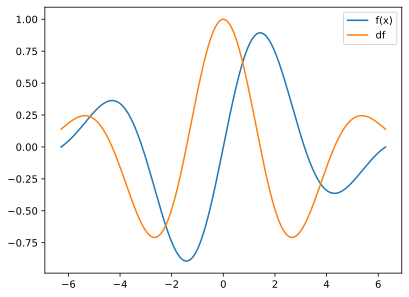

In [2]:
# The function
x = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)

# The derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

# quick plot for inspection
plt.plot(x,fx, x,df)
plt.legend(['f(x)','df'])

In [3]:
# Functions (Overwritting variable names)
def fx(x):
    return np.sin(x) * np.exp(-x**2*.05)

#derivative function
def deriv(x):
    return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

[-4.11548638]


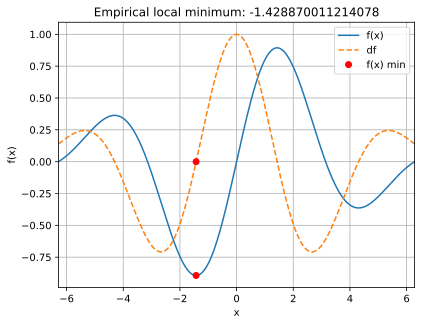

In [6]:
#Random starting point
localmin = np.random.choice(x,1)#np.array([6])#
print(localmin)

#learning parameters
learning_rate = 0.1
training_epochs = 1000

#run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

localmin 

#}Plot the results

plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot( localmin,deriv(localmin),'ro')
plt.plot(localmin, fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])

plt.show()

## Run parametric experiments

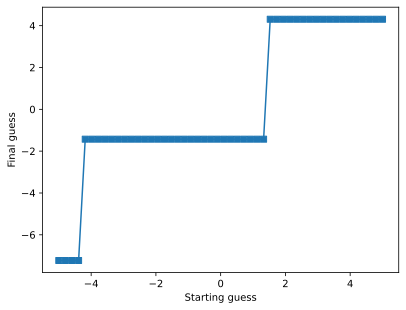

In [7]:
# Eperiment 1: Systematically varying the starting locations

startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

#loop over starting points
for idx, localmin in enumerate(startlocs):

    #run through training
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate*grad

    #store final rguess
    finalres[idx] = localmin

# plot the results
plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

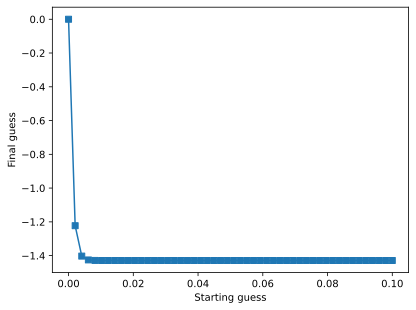

In [10]:
# Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

#loop over starting points
for idx,learningRate in enumerate(learningrates):

    #Force starting guess to 0
    localmin = 0

    #run through training
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learningRate*grad

    #store final rguess
    finalres[idx] = localmin

# plot the results
plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

In [15]:
# Experiment 3: interaction between learning rate and training epochs

#setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

#initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))

#loop over starting points
for lr_idx,learningRate in enumerate(learningrates):

    #loop over training epochs
    for e_idx,trainEpochs in enumerate(training_epochs):

        #run through training
        localmin = 0
        for i in range(int(trainEpochs)):
            grad = deriv(localmin)
            localmin = localmin - learningRate*grad

        #store the final guss
        finalres[lr_idx,e_idx] = localmin


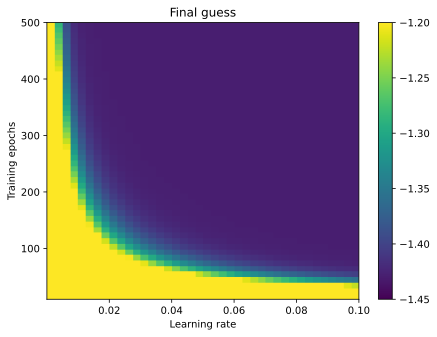

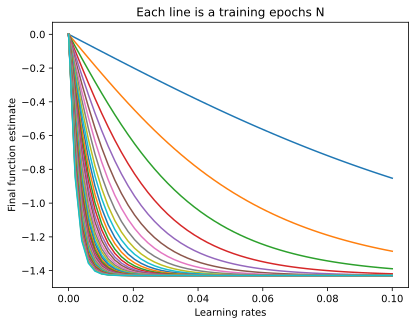

In [16]:
# Plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

In [17]:

# 1) In experiment 3, set the starting location to be 1.6. Re-run the experiment and the image. You'll need to re-adjust 
#    the figure color limits; check the line plots at the top of the code to determine a useful color range. Does the new
#    starting value change your conclusions about the interaction between learning rate and training epochs?


#setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

#initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))

#loop over starting points
for lr_idx,learningRate in enumerate(learningrates):

    #loop over training epochs
    for e_idx,trainEpochs in enumerate(training_epochs):

        #run through training
        localmin = 1.6
        for i in range(int(trainEpochs)):
            grad = deriv(localmin)
            localmin = localmin - learningRate*grad

        #store the final guss
        finalres[lr_idx,e_idx] = localmin


-7.219807100332776
6.126105670999173


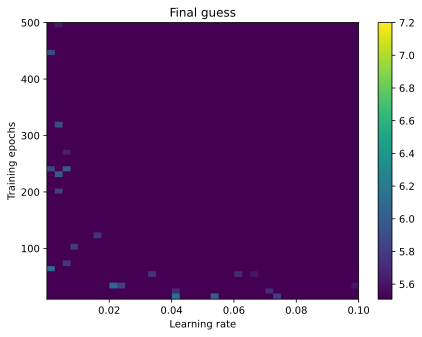

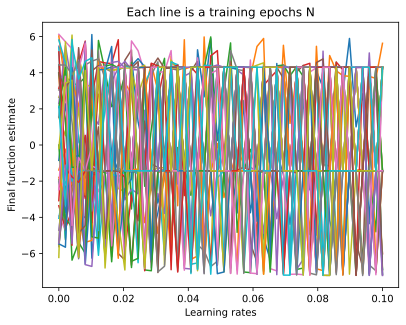

In [35]:
# Plot the results

fig,ax = plt.subplots(figsize=(7,5))

print(np.min(finalres))
print(np.max(finalres))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=7.2,vmax=6.12)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

In [36]:
# 2) In the same experiment, now change the starting location to be random (use code: np.random.choice(x,1)). How do these
#    results look? Are you surprised? Are the results of this experiment still interpretable and what does this tell you 
#    about running experiments in DL?
# 
     
# Experiment 3: interaction between learning rate and training epochs

#setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

#initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))

#loop over starting points
for lr_idx,learningRate in enumerate(learningrates):

    #loop over training epochs
    for e_idx,trainEpochs in enumerate(training_epochs):

        #run through training
        localmin = np.random.choice(x,1)
        for i in range(int(trainEpochs)):
            grad = deriv(localmin)
            localmin = localmin - learningRate*grad

        #store the final guss
        finalres[lr_idx,e_idx] = localmin


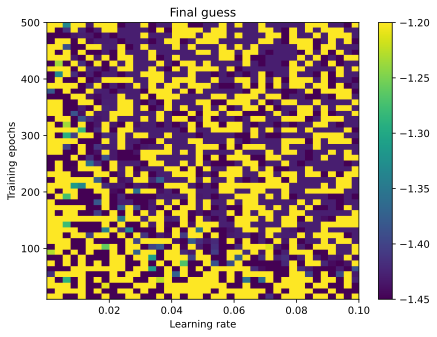

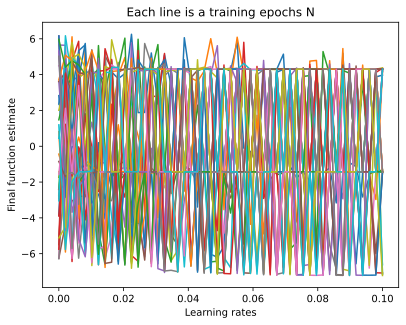

In [37]:
# Plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()